# Fullscan Renders
Outputting the graphs of the data collected by running the robot :) This data is just for viewing purposes, there is a separate notebook for testing the pathfinder modules.

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json
import pandas as pd
from scipy.optimize import curve_fit


from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [100]:
path = os.path.abspath('..\\')
print("Available test files:")
file_itr = 0
while os.path.exists(path + "\\Scans\\test_%s.json" % file_itr):
    print("\t\\Scans\\test_%s.json" % file_itr)
    file_itr +=1
file_itr = 0
while os.path.exists(path + "\\Debugging Scripts\\Scans\\test_%s.json" % file_itr):
    print("\t\\Debugging Scripts\\Scans\\test_%s.json" % file_itr)
    file_itr +=1



Available test files:
	\Scans\test_0.json
	\Scans\test_1.json
	\Scans\test_2.json
	\Scans\test_3.json
	\Scans\test_4.json
	\Scans\test_5.json
	\Scans\test_6.json
	\Scans\test_7.json
	\Scans\test_8.json
	\Scans\test_9.json
	\Scans\test_10.json
	\Scans\test_11.json
	\Debugging Scripts\Scans\test_0.json
	\Debugging Scripts\Scans\test_1.json
	\Debugging Scripts\Scans\test_2.json


In [101]:
debug_mode = True
save_figs = False
file_no = 6

if save_figs:
    plt.rcParams['figure.dpi'] = 500
else:
    plt.rcParams['figure.dpi'] = 200

In [102]:
# current_file = r"\Debugging Scripts\test_%s.json" % file_no
current_file = r"\Scans\test_%s.json" % file_no
path = os.path.abspath('..\\') + current_file

if debug_mode:
    print(path)

with open(path, 'r') as infile:
    json_data = json.load(infile)

r_o_m = json_data["range of motion"]
resolution = json_data["resolution"]
point_mags = json_data["points"]
max_point = json_data["max_point"]

if debug_mode:
    for i in json_data.keys():
        if i != "points":
            print(f"{i}: {json_data[i]}")
    # print(point_mags[0])
    # print(max_point)
    # print(resolution)
    # print(r_o_m)

c:\Users\ander\OneDrive - UW\Robotics lab material\Robotics Control Code\Ben's Control Code\Scans\test_6.json
range of motion: {'X': [0, 0], 'Y': [0, 0], 'Z': [-14, 14], 'Rx': [-13, 13], 'Ry': [-13, 13], 'Rz': [0, 0]}
resolution: [0.4, 1]
max_point: [[[0.0, 0.0, 2.400000000000002], [0.0, 1.0, 0.0]], 621.204]


In [126]:
# Gonna find the set of Rxs and Rys corresponding only to the Z value found at the max point
# Then do the same for the other guys
r = dict()
active_rom = []
for DoF in r_o_m:
    r[DoF] = (r_o_m[DoF][1] - r_o_m[DoF][0]) / 2
    if r[DoF] != 0.0:
        active_rom.append(DoF)

indeces = {'X': (0,0), 'Y': (0,1), 'Z': (0,2), 'Rx': (1,0), 'Ry': (1,1), 'Rz': (1,2)}
points = np.array([[p[0][indeces[a][0]][indeces[a][1]] for a in active_rom] for p in point_mags])
magss = np.array([[p[1] for p in point_mags]])
magss = magss.T

np_all = np.hstack((points,magss))

dat = pd.DataFrame(data = np_all, columns=["Z", "Rx","Ry","mag"])
mp = dat.loc[dat['mag'].idxmax()]
print(mp)
print(dat.head())
print(dat.shape)

Z        2.400
Rx       0.000
Ry       1.000
mag    621.204
Name: 30246, dtype: float64
0.0
      Z    Rx    Ry      mag
0 -14.0 -13.0 -12.0  216.071
1 -14.0 -13.0 -11.0   39.674
2 -14.0 -13.0 -10.0   39.674
3 -14.0 -13.0  -9.0   39.674
4 -14.0 -13.0  -8.0   39.674
(51749, 4)


Maximum magnitude:  621.204
Minimum magnitude: 32.197
Median magnitude: 47.151


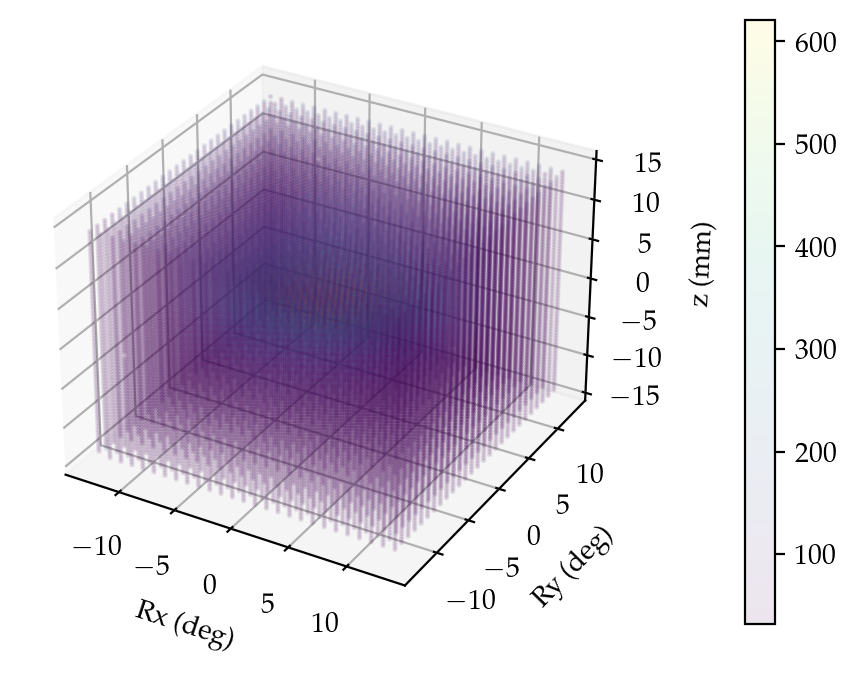

621.204


In [104]:
ax = plt.axes(projection='3d')

if debug_mode:
    print(f"Maximum magnitude:  {max(dat['mag'])}")
    print(f"Minimum magnitude: {min(dat['mag'])}")
    print(f"Median magnitude: {np.median(dat['mag'])}")

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

med = np.median(dat['mag'])
# dat2 = dat[np.all([dat['mag'] > med*1.3, dat['Ry'] > 5],axis=0)]
dat2 = dat[dat['mag'] > med*1.3]

# fig = ax.scatter(dat2['Rx'], dat2['Ry'], dat2['Z'], c=dat2['mag'], cmap='viridis', alpha=0.1,s=4)
fig = ax.scatter(dat['Rx'], dat['Ry'], dat['Z'], c=dat['mag'], cmap='viridis', alpha=0.1,s=1)

ax.set_xlabel("Rx (deg)")
ax.set_ylabel("Ry (deg)")
ax.set_zlabel("z (mm)")

plt.colorbar(fig, pad=0.13)
if save_figs:
    plt.savefig("fullscan_render_test_%s.jpg" % file_no, dpi=400)
plt.show()

print(max(dat['mag']))


In [105]:
# "mps" stands for "max points," or all the points in Rx/Ry space that occur at the max
# value of Z, rotated for each of the other dimensions
# mp = max_point[0]

zmps = dat[dat['Z'] == mp['Z']]
Rxmps = dat[dat['Rx'] == mp['Rx']]
Rymps = dat[dat['Ry'] == mp['Ry']]

if debug_mode:
    print(f"Active range of motion: {active_rom}")
    print(f"Shape of points array: {points.shape}")
    print(f"Shape of magnitudes array: {magss.shape} \n(Should be 1-D, same length as points array)")
    print(f"Tenth point_mag item (representative): {np_all[10]}")
    print(f"Testing the Z-max-points array:\n{zmps.head(4)}\n(Should be all the same as in the maxpoint)")
    print(f"Maximum point: {mp}")

Active range of motion: ['Z', 'Rx', 'Ry']
Shape of points array: (51749, 3)
Shape of magnitudes array: (51749, 1) 
(Should be 1-D, same length as points array)
Tenth point_mag item (representative): [-14.    -13.     -2.     37.233]
Testing the Z-max-points array:
         Z    Rx    Ry     mag
29881  2.4 -13.0  13.0  37.233
29882  2.4 -13.0  12.0  37.233
29883  2.4 -13.0  11.0  34.639
29884  2.4 -13.0  10.0  34.639
(Should be all the same as in the maxpoint)
Maximum point: Z        2.400
Rx       0.000
Ry       1.000
mag    621.204
Name: 30246, dtype: float64


In [106]:
# foo_isolated_mps refers to the points along the isolated foo axis when the other axes are at their optimal values
z_isolated_mps = dat[np.all([dat['Rx'] == mp['Rx'], dat['Ry'] == mp['Ry']],axis=0)].reset_index(drop=True)
Rx_isolated_mps = dat[np.all([dat['Z'] == mp['Z'], dat['Ry'] == mp['Ry']],axis=0)].reset_index(drop=True)
Ry_isolated_mps = dat[np.all([dat['Z'] == mp['Z'], dat['Rx'] == mp['Rx']],axis=0)].reset_index(drop=True)

if debug_mode:
    print(Ry_isolated_mps.head())
    # print(Rx_isolated_mps)
    # print(Ry_isolated_mps)
    pass

     Z   Rx    Ry      mag
0  2.4  0.0 -13.0   47.151
1  2.4  0.0 -12.0   47.151
2  2.4  0.0 -11.0   66.988
3  2.4  0.0 -10.0   91.861
4  2.4  0.0  -9.0  121.769


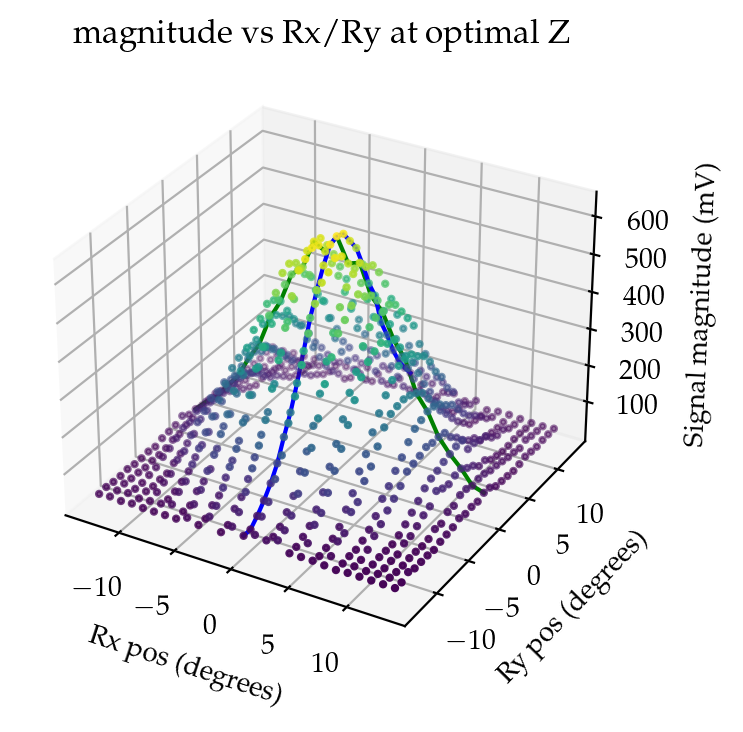

In [107]:
# fig2 = plt.figure(figsize=(14,4), constrained_layout=True)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

# tax = fig2.add_subplot(1,3,1, projection='3d')
tax = plt.axes(projection='3d')
tax.scatter3D(zmps['Rx'], zmps['Ry'], zmps['mag'],c=zmps['mag'], cmap='viridis',s=4)
tax.plot3D(Rx_isolated_mps['Rx'], Rx_isolated_mps['Ry'], Rx_isolated_mps['mag'], c='g')
tax.plot3D(Ry_isolated_mps['Rx'], Ry_isolated_mps['Ry'], Ry_isolated_mps['mag'], c='b')
tax.set_title("magnitude vs Rx/Ry at optimal Z")
tax.set_xlabel("Rx pos (degrees)")
tax.set_ylabel("Ry pos (degrees)")
tax.set_zlabel("Signal magnitude (mV)")

# tax = fig2.add_subplot(1,3,2, projection='3d')
# # tax.plot_trisurf(Rxmps[:,0], Rxmps[:,2], Rxmps[:,3], cmap='viridis')
# tax.scatter(Rxmps['Z'], Rxmps['Ry'], Rxmps['mag'],c=Rxmps['mag'], cmap='viridis')
# # tax.plot3D(z_isolated_mps[:,0], z_isolated_mps[:,2], z_isolated_mps[:,3], c='r')
# # tax.plot3D(Ry_isolated_mps[:,0], Ry_isolated_mps[:,2], Ry_isolated_mps[:,3], c='b')
# tax.set_title("magnitude vs Z/Ry at optimal Rx")
# tax.set_xlabel("Z pos (mm)")
# tax.set_ylabel("Ry pos (degrees)")
# tax.set_zlabel("Signal magnitude (mV)")

# tax = fig2.add_subplot(1,3,3, projection='3d')
# # tax.plot_trisurf(Rymps[:,0], Rymps[:,1], Rymps[:,3], cmap='viridis')
# tax.scatter(Rymps['Z'], Rymps['Rx'], Rymps['mag'],c=Rymps['mag'], cmap='viridis')
# # tax.plot3D(z_isolated_mps[:,0], z_isolated_mps[:,1], z_isolated_mps[:,3], c='r')
# # tax.plot3D(Rx_isolated_mps[:,0], Rx_isolated_mps[:,1], Rx_isolated_mps[:,3], c='g')
# tax.set_title("magnitude vs Z/Rx at optimal Ry")
# tax.set_xlabel("Z pos (degrees)")
# tax.set_ylabel("Rx pos (degrees)")
# tax.set_zlabel("Signal magnitude (mV)")

plt.show()

[6310.53765579  -63.64682203   91.78966764 -397.73719732 1118.79197272]
0.14157932965102105


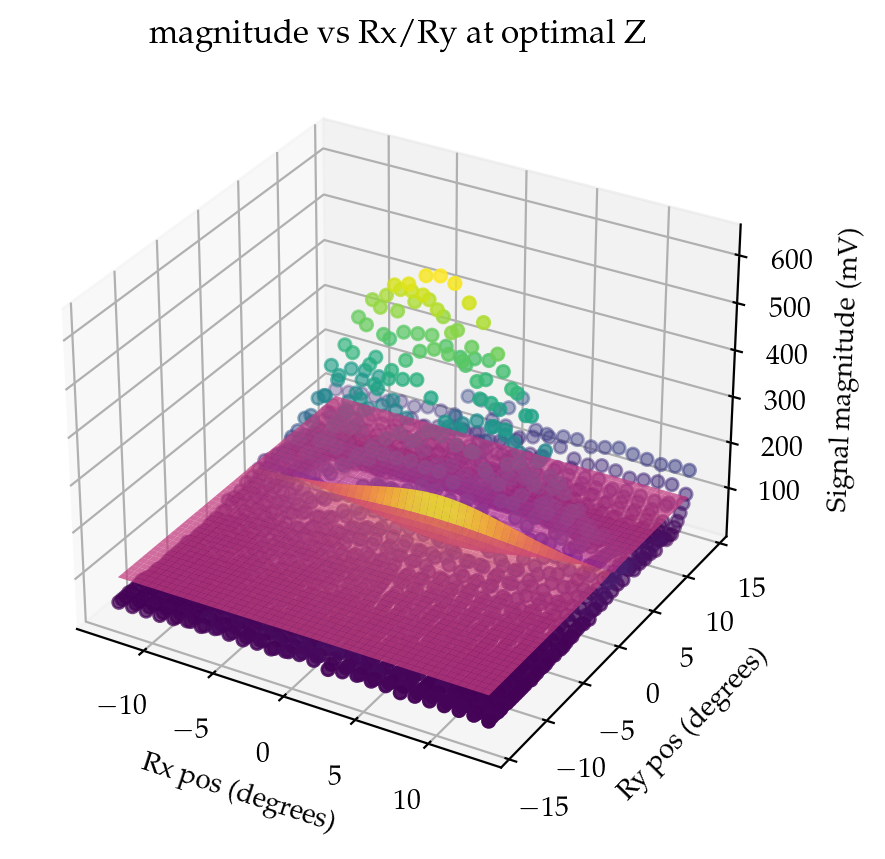

In [172]:
fig_anim = plt.figure(figsize=(5,5))
tax = plt.axes(projection="3d")

# print(zmps.reset_index())

# tax.scatter3D(zmps['Rx'], zmps['Ry'], zmps['mag'],c=zmps['mag'], cmap='viridis',alpha=0.5,s=2)
tax.scatter3D(Rxmps['Ry'], Rxmps['Z'], Rxmps['mag'], cmap='viridis',c=Rxmps['mag'])
# tax.plot3D(Ry_isolated_mps[:,1], Ry_isolated_mps[:,2], Ry_isolated_mps[:,3], c='b')
tax.set_title("magnitude vs Rx/Ry at optimal Z")
tax.set_xlabel("Rx pos (degrees)")
tax.set_ylabel("Ry pos (degrees)")
tax.set_zlabel("Signal magnitude (mV)")

def angle_func(data,a,b,c):
    x=data[0]
    y=data[1]
    return c + (a * (np.e)**(-b * ((np.arccos(np.cos(np.deg2rad(x-mp['Rx'])) * np.cos(np.deg2rad(y-mp['Ry'])))))**2))

def ang_plus_z(data,a,b,c,f,g):
    x=data[0]
    y=data[1]

    return c + (a * (np.e)**(b * (np.arccos(np.cos(np.deg2rad(x-mp['Ry']))))**2)) * (1/(y**2 + f*y + g))

popt, pcov = curve_fit(ang_plus_z, [Rxmps['Ry'], Rxmps['Z']], Rxmps['mag'])

print(popt)

# create surface function model
# setup data points for calculating surface model
# model_x_data = np.linspace(min(zmps['Rx']), max(zmps['Rx']), 50)
# model_y_data = np.linspace(min(zmps['Ry']), max(zmps['Ry']), 50)

model_x_data = np.linspace(min(Rxmps['Ry']), max(Rxmps['Ry']), 50)
model_y_data = np.linspace(min(Rxmps['Z']), max(Rxmps['Z']), 50)

# create coordinate arrays for vectorized evaluations
X, Y = np.meshgrid(model_x_data, model_y_data)

# calculate Z coordinate array
Z = ang_plus_z(np.array([X, Y]), *popt)
tax.plot_surface(X,Y,Z, cmap='plasma',alpha=0.75)

def r_squared(func, popt, x_dat, y_dat):
    residuals = y_dat - func(x_dat, *popt)
    ss_res = np.sum(residuals**2)

    ss_tot = np.sum((y_dat - np.mean(y_dat))**2)

    return 1 - (ss_res/ss_tot)

print(r_squared(ang_plus_z, popt, [Rxmps['Ry'], Rxmps['Z']], Rxmps['mag']))

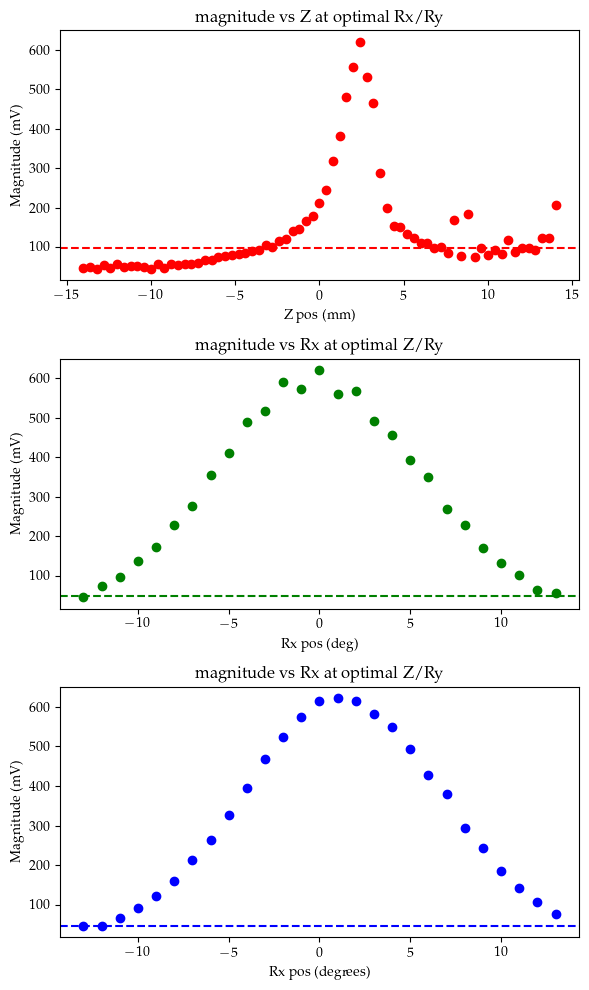

In [ ]:
fig3 = plt.figure(figsize=(6,10), dpi=100)
# plt.subplots_adjust(left=0.1,
#                     bottom=0.1, 
#                     right=0.9, 
#                     top=0.9, 
#                     wspace=0.8, 
#                     hspace=0.4)

tax = fig3.add_subplot(311)
tax.scatter(z_isolated_mps['Z'],z_isolated_mps['mag'], c='r')
tax.axhline(np.median(z_isolated_mps['mag']), c='r',ls='--')
# tax.axhline(np.median(dat['mag']), c='r',ls='--')
tax.set_title("magnitude vs Z at optimal Rx/Ry")
tax.set_xlabel("Z pos (mm)")
tax.set_ylabel("Magnitude (mV)")

tax = fig3.add_subplot(312)
tax.scatter(Rx_isolated_mps['Rx'],Rx_isolated_mps['mag'], c='g')
tax.axhline(np.median(dat['mag']), c='g',ls='--')
tax.set_title("magnitude vs Rx at optimal Z/Ry") 
tax.set_xlabel("Rx pos (deg)")
tax.set_ylabel("Magnitude (mV)")

tax = fig3.add_subplot(313)
tax.scatter(Ry_isolated_mps['Ry'],Ry_isolated_mps['mag'], c='b')
tax.axhline(np.median(dat['mag']), c='b',ls='--')
tax.set_title("magnitude vs Rx at optimal Z/Ry")
tax.set_xlabel("Rx pos (degrees)")
tax.set_ylabel("Magnitude (mV)")

fig3.tight_layout()

In [222]:
import fit_funcs
from fit_funcs import *


funcs = [polynomial_2,rational_2,gauss,absolute]

[ -3.54873562  -1.47316537 521.71371077]
[-0.00195778  0.01998058  0.00158289]
[ 5.95926407e+02  1.52077203e-02 -1.16169724e-01]
[ -2.07557025  46.04071556 418.54524561]


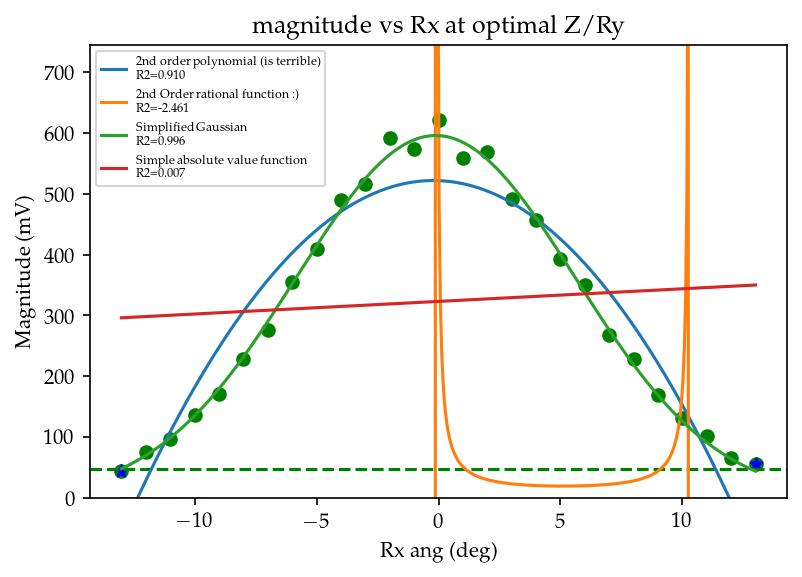

In [223]:
fig4 = plt.axes()
fig4.get_figure().dpi=150

interpolation_windows= { \
    "Z": [16,56], \
    "Rx": [0,26], \
    "Ry": [1,26]}

t = {'Z': {'data': z_isolated_mps, 'color1': 'r', 'noise': np.median(dat['mag']), 'color2':'g', \
    'header':'magnitude vs Z at optimal Rx/Ry', 'x-axis': "Z pos (mm)"}, \
    'Rx': {'data': Rx_isolated_mps, 'color1': 'g', 'noise': np.median(dat['mag']), 'color2':'b', \
    'header':'magnitude vs Rx at optimal Z/Ry', 'x-axis': "Rx ang (deg)"}, \
    'Ry': {'data': Ry_isolated_mps, 'color1':'b', 'noise': np.median(dat['mag']), 'color2':'r', \
    'header':'magnitude vs Ry at optimal Z/Rx', 'x-axis':"Ry ang (deg)"}}

b = "Rx"
a = interpolation_windows[b]

fig4.scatter(t[b]['data'][b],t[b]['data']['mag'], c=t[b]['color1'])

fig4.scatter(t[b]['data'][b][a],t[b]['data']['mag'][a], c=t[b]['color2'], marker='*')
fig4.axhline(t[b]['noise'], c='g',ls='--')

x = np.linspace(t[b]['data'][b][a[0]],t[b]['data'][b][a[1]],500)
# x = np.linspace(t[b]['data'][b][0],max(t[b]['data'][b]),500)

x_data = t[b]['data'][b][a[0]:a[1]]
y_data = t[b]['data']['mag'][a[0]:a[1]]

for fun in funcs:
    popt, pcov = curve_fit(fun, x_data, y_data)
    print(popt)
    fig4.plot(x, fun(x, *popt), label=fun.__doc__ + f"\n R2={r_squared(fun, popt, x_data, y_data):0.3f}")

fig4.set_title(t[b]['header'])
fig4.set_xlabel(t[b]['x-axis'])
fig4.set_ylabel("Magnitude (mV)")
fig4.legend(prop={'size':6})
fig4.set_ybound([0, t[b]['data']['mag'].max() * 1.2])